# Assignment 1: KMeans Clustering

## Name : Adhrushta Arashanapalli
### NUID: 002969521

Introduction

k-means is an unsupervised machine learning algorithm used to find groups of observations (clusters) that share similar characteristics. What is the meaning of unsupervised learning? It means that the observations given in the data set are unlabeled, there is no outcome to be predicted. We are going to use a card usage data set to cluster different groups based on their card usage characteristics.

Dataset Link: https://www.kaggle.com/datasets/noordeen/card-usage

## Importing necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline

In [2]:
credit_df = pd.read_csv("CreditCardUsage.csv")
credit_df.head(5)

,CUST_ID,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,1,40.900749,95.40,0.000000,0.166667,2,1000.0,201.802084,139.509787
1,2,3202.467416,0.00,6442.945483,0.000000,0,7000.0,4103.032597,1072.340217
2,3,2495.148862,773.17,0.000000,1.000000,12,7500.0,622.066742,627.284787
3,4,1666.670542,1499.00,205.788017,0.083333,1,7500.0,0.000000,NaN
4,5,817.714335,16.00,0.000000,0.083333,1,1200.0,678.334763,244.791237


In [3]:
credit_df.shape

(8949, 9)

In [4]:
credit_df.describe()

,CUST_ID,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8636.000000
mean,4475.000000,1564.647593,1003.316936,978.959616,0.490405,14.711476,4494.449450,1733.336511,864.304943
std,2583.498113,2081.584016,2136.727848,2097.264344,0.401360,24.858552,3638.815725,2895.168146,2372.566350
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163
25%,2238.000000,128.365782,39.800000,0.000000,0.083333,1.000000,1600.000000,383.282850,169.163545
50%,4475.000000,873.680279,361.490000,0.000000,0.500000,7.000000,3000.000000,857.062706,312.452292
75%,6712.000000,2054.372848,1110.170000,1113.868654,0.916667,17.000000,6500.000000,1901.279320,825.496463
max,8949.000000,19043.138560,49039.570000,47137.211760,1.000000,358.000000,30000.000000,50721.483360,76406.207520


In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              8949 non-null   int64  
 1   BALANCE              8949 non-null   float64
 2   PURCHASES            8949 non-null   float64
 3   CASH_ADVANCE         8949 non-null   float64
 4   PURCHASES_FREQUENCY  8949 non-null   float64
 5   PURCHASES_TRX        8949 non-null   int64  
 6   CREDIT_LIMIT         8949 non-null   float64
 7   PAYMENTS             8949 non-null   float64
 8   MINIMUM_PAYMENTS     8636 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 629.4 KB


From above info you can see that minimum payments columnn has few Null values. Let's take a closer look at that

In [6]:
credit_df.isna().sum()

CUST_ID                  0
BALANCE                  0
PURCHASES                0
CASH_ADVANCE             0
PURCHASES_FREQUENCY      0
PURCHASES_TRX            0
CREDIT_LIMIT             0
PAYMENTS                 0
MINIMUM_PAYMENTS       313
dtype: int64

In [7]:
credit_df[['MINIMUM_PAYMENTS']]

,MINIMUM_PAYMENTS
0,139.509787
1,1072.340217
2,627.284787
3,NaN
4,244.791237
...,...
8944,48.886365
8945,NaN
8946,82.418369
8947,55.755628


Replacing all the Null values in MINIMUM_PAYMENTS column with mean

In [8]:
credit_df[['MINIMUM_PAYMENTS']]=credit_df[['MINIMUM_PAYMENTS']].replace(np.nan, credit_df[['MINIMUM_PAYMENTS']].mean())

In [9]:
credit_df[['MINIMUM_PAYMENTS']]

,MINIMUM_PAYMENTS
0,139.509787
1,1072.340217
2,627.284787
3,864.304943
4,244.791237
...,...
8944,48.886365
8945,864.304943
8946,82.418369
8947,55.755628


Dropping duplicate rows:

In [10]:
proc_df = credit_df.drop_duplicates()
print(proc_df.shape)
proc_df.head()

(8949, 9)


,CUST_ID,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,1,40.900749,95.40,0.000000,0.166667,2,1000.0,201.802084,139.509787
1,2,3202.467416,0.00,6442.945483,0.000000,0,7000.0,4103.032597,1072.340217
2,3,2495.148862,773.17,0.000000,1.000000,12,7500.0,622.066742,627.284787
3,4,1666.670542,1499.00,205.788017,0.083333,1,7500.0,0.000000,864.304943
4,5,817.714335,16.00,0.000000,0.083333,1,1200.0,678.334763,244.791237



Filtering columns that are required for the KMeans clustering

In [11]:
df = proc_df [['CUST_ID','BALANCE','CREDIT_LIMIT','PAYMENTS']]
print(df.shape)
df.head()

(8949, 4)


,CUST_ID,BALANCE,CREDIT_LIMIT,PAYMENTS
0,1,40.900749,1000.0,201.802084
1,2,3202.467416,7000.0,4103.032597
2,3,2495.148862,7500.0,622.066742
3,4,1666.670542,7500.0,0.000000
4,5,817.714335,1200.0,678.334763


In [12]:
df.describe()

,CUST_ID,BALANCE,CREDIT_LIMIT,PAYMENTS
count,8949.000000,8949.000000,8949.000000,8949.000000
mean,4475.000000,1564.647593,4494.449450,1733.336511
std,2583.498113,2081.584016,3638.815725,2895.168146
min,1.000000,0.000000,50.000000,0.000000
25%,2238.000000,128.365782,1600.000000,383.282850
50%,4475.000000,873.680279,3000.000000,857.062706
75%,6712.000000,2054.372848,6500.000000,1901.279320
max,8949.000000,19043.138560,30000.000000,50721.483360


From the above description of the data, we can see that the data is skewed. Let's tranform the data to remove skeweness

In [13]:
df2 = np.log(df + 1)
print(df2.shape)
df2.head()

(8949, 4)


,CUST_ID,BALANCE,CREDIT_LIMIT,PAYMENTS
0,0.693147,3.735304,6.908755,5.312231
1,1.098612,8.071989,8.853808,8.319725
2,1.386294,7.822504,8.922792,6.434654
3,1.609438,7.419183,8.922792,0.000000
4,1.791759,6.707735,7.090910,6.521114


In [14]:
df2.describe()

,CUST_ID,BALANCE,CREDIT_LIMIT,PAYMENTS
count,8949.000000,8949.000000,8949.000000,8949.000000
mean,8.100925,6.161994,8.094835,6.625023
std,0.993676,2.013132,0.819674,1.591197
min,0.693147,0.000000,3.931826,0.000000
25%,7.713785,4.862644,7.378384,5.951379
50%,8.406485,6.773858,8.006701,6.754677
75%,8.811801,7.628213,8.779711,7.550808
max,9.099409,9.854515,10.308986,10.834125


In [15]:
print(df.skew())

CUST_ID         0.000000
BALANCE         2.393270
CREDIT_LIMIT    1.522464
PAYMENTS        5.907465
dtype: float64


# Developing K-Means Clustering Algorithm

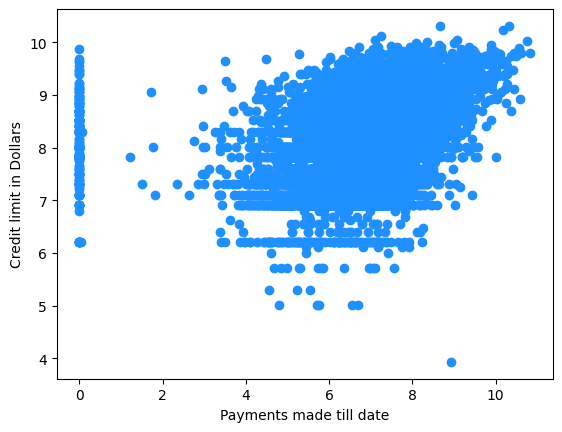

In [16]:
X = df2[["CREDIT_LIMIT","PAYMENTS"]]
plt.scatter(X["PAYMENTS"],X["CREDIT_LIMIT"],c='dodgerblue')
plt.xlabel('Payments made till date')
plt.ylabel('Credit limit in Dollars')
plt.show()

the above scatterplot gives us an idea about the distribution of data before clustering

In [17]:
def KMeans(K,X):
  
    Centroids = (X.sample(n=K))
    plt.scatter(X["PAYMENTS"],X["CREDIT_LIMIT"],c='blue')
    plt.scatter(Centroids["PAYMENTS"],Centroids["CREDIT_LIMIT"],c='red')
    plt.xlabel('Payments made till date')
    plt.ylabel('Credit limit in Dollars')
    plt.show()

    diff = 1
    j=0

    while(diff!=0):
        XD=X
        i=1
        for index1,row_c in Centroids.iterrows():
            ED=[]
            for index2,row_d in XD.iterrows():
                d1=(row_c["PAYMENTS"]-row_d["PAYMENTS"])**2
                d2=(row_c["CREDIT_LIMIT"]-row_d["CREDIT_LIMIT"])**2
                d=np.sqrt(d1+d2)
                ED.append(d)
            X[i]=ED
            i=i+1

        C=[]
        for index,row in X.iterrows():
            min_dist=row[1]
            pos=1
            for i in range(K):
                if row[i+1] < min_dist:
                    min_dist = row[i+1]
                    pos=i+1
            C.append(pos)
        X["Cluster"]=C
        Centroids_new = X.groupby(["Cluster"]).mean()[["CREDIT_LIMIT","PAYMENTS"]]
        if j == 0:
            diff=1
            j=j+1
        else:
            diff = (Centroids_new['CREDIT_LIMIT'] - Centroids['CREDIT_LIMIT']).sum() + (Centroids_new['PAYMENTS'] - Centroids['PAYMENTS']).sum()
            #print(diff.sum())
        Centroids = X.groupby(["Cluster"]).mean()[["CREDIT_LIMIT","PAYMENTS"]]

    color=['blue','green','cyan','yellow','pink','darkcyan','brown','purple']
    for k in range(K):
        data=X[X["Cluster"]==k+1]
        plt.scatter(data["PAYMENTS"],data["CREDIT_LIMIT"],c=color[k])
    plt.scatter(Centroids["PAYMENTS"],Centroids["CREDIT_LIMIT"],c='red')
    plt.xlabel('Payments made till date')
    plt.ylabel('Credit limit in Dollars')
    plt.show()

The above function Selects random centroids, Assign all the points closer to the closet centroid, Recalculate centroids for the newly formed clusters and repeat the process of assigning points to the closet centroid and recalculating the centroids for the new clusters

Now testing function with different k values, to determine the optimal number of clusters.
For each value of K we will look at the intial vs final scatterplots to get an understanding of clustering is working

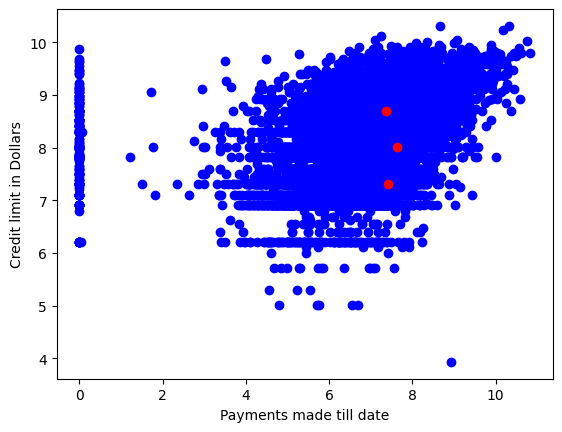

<ipython-input-17-8473a2974b7c>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


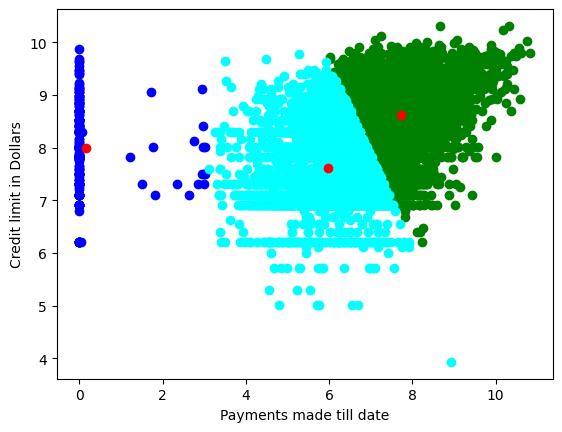

In [18]:
KMeans(3,X)

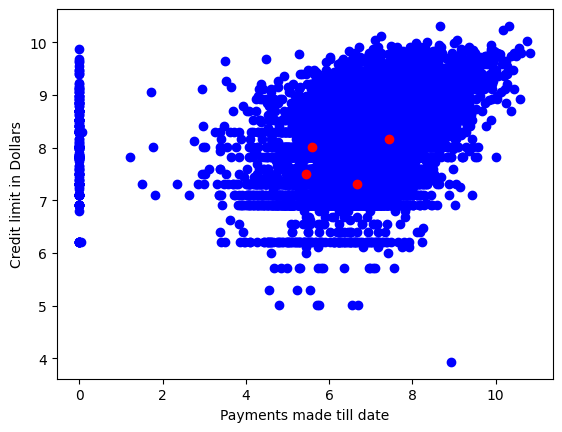

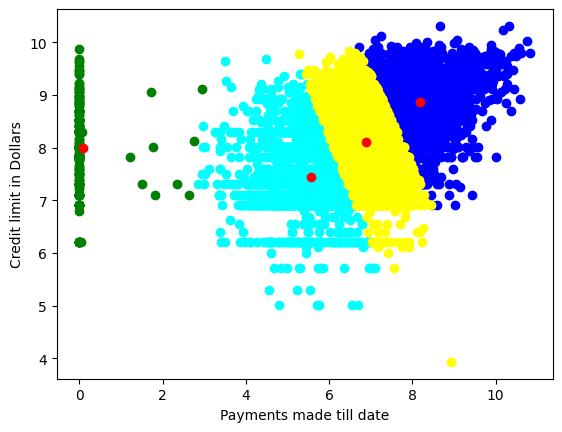

In [19]:
KMeans(4,X)

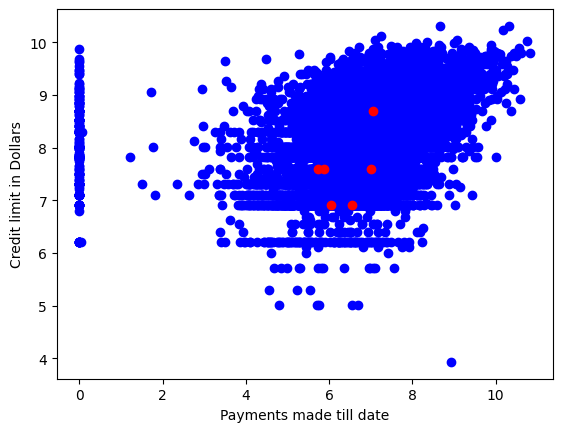

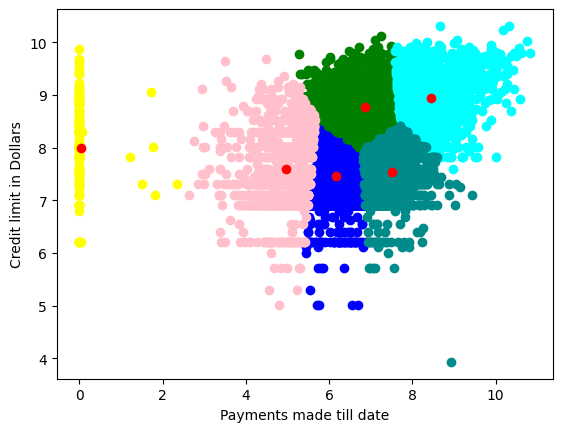

In [20]:
KMeans(6,X)

# Determinig optimal number of clusters : Elbow Method

In [21]:
num_of_iterations = 5
epsilon = list(range(num_of_iterations)) 

Text(0, 0.5, 'Square root of epsilon')

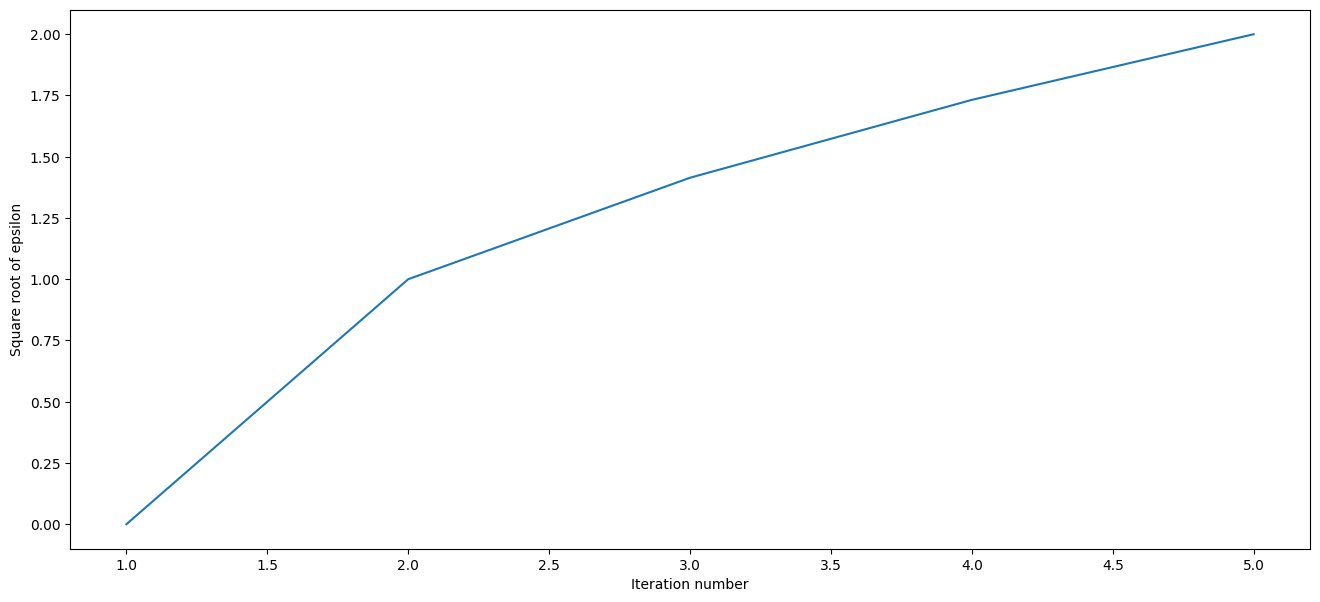

In [22]:
a = list(range(1,6))
plt.figure(figsize=(16,7))
plt.plot(a, [x**0.5 for x in epsilon])
plt.xlabel('Iteration number') 
plt.ylabel('Square root of epsilon') 

From the above plot we can see that after 3rd iteration there isn't any significant change. Hence, 3 is the optimal number of clusters

# References:

https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42
https://www.kaggle.com/venky12347/credit-card-usage-k-means-clustering

